In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

DATADIR = "/home/jrichwiltshire/tensorflow/PetImages"
CATEGORIES = ["Dog", "Cat"]

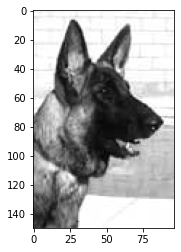

In [2]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [3]:
print(img_array.shape)

(150, 97)


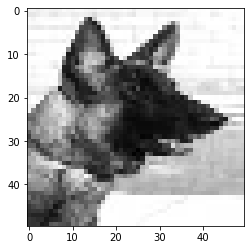

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [9]:
training_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass


create_training_data()

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


In [10]:
print(len(training_data))

24946


In [11]:
import random

random.shuffle(training_data)

In [13]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
0
0
1
0
0


In [14]:
X = []
y = []

In [15]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)   

In [16]:
import pickle

pickle_out = open('X.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)

In [18]:
X[1]

array([[[162],
        [165],
        [121],
        ...,
        [ 78],
        [ 87],
        [109]],

       [[204],
        [157],
        [105],
        ...,
        [ 76],
        [ 92],
        [ 88]],

       [[243],
        [128],
        [126],
        ...,
        [ 99],
        [ 90],
        [ 91]],

       ...,

       [[ 43],
        [ 34],
        [ 24],
        ...,
        [237],
        [250],
        [253]],

       [[ 31],
        [ 40],
        [ 26],
        ...,
        [200],
        [249],
        [249]],

       [[ 38],
        [ 30],
        [ 27],
        ...,
        [246],
        [179],
        [240]]], dtype=uint8)